In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df = pd.read_csv('./Datasets/main_dataset.csv')

In [5]:
df.shape

(1245798, 86)

In [6]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1','Flow ID'],axis=1)
df.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.31.69.25,80,18.219.193.20,55712,6,16/02/2018 11:23:22 PM,4383812,4,4,935.0,345.0,935.0,0.0,233.75,467.5,345.0,0.0,86.25,172.5,291.983324,1.824896,626258.857143,1.606503e+06,4268914.0,6.0,114892.0,38297.333333,35945.256451,71348.0,28.0,4312430.0,1.437477e+06,2.452184e+06,4268914.0,1117.0,0,0,0,0,136,136,0.912448,0.912448,0.0,935.0,142.222222,318.434757,101400.694444,0,0,0,0,1,0,0,0,1.0,160.000,233.75,86.25,0,0,0,0,0,0,4,935,4,345,-1,211,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,172.31.69.25,80,18.219.193.20,55840,6,16/02/2018 11:23:22 PM,4386838,4,4,935.0,328.0,935.0,0.0,233.75,467.5,328.0,0.0,82.00,164.0,287.906688,1.823637,626691.142857,1.616711e+06,4292659.0,6.0,94173.0,31391.000000,32215.323310,64395.0,27.0,4322410.0,1.440803e+06,2.469800e+06,4292659.0,4685.0,0,0,0,0,136,136,0.911818,0.911818,0.0,935.0,140.333333,317.129311,100571.000000,0,0,0,0,1,0,0,0,1.0,157.875,233.75,82.00,0,0,0,0,0,0,4,935,4,328,-1,211,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,172.31.69.25,80,18.219.193.20,55942,6,16/02/2018 11:23:22 PM,4369566,4,4,935.0,324.0,935.0,0.0,233.75,467.5,324.0,0.0,81.00,162.0,288.129302,1.830845,624223.714286,1.613505e+06,4282926.0,3.0,86634.0,28878.000000,32819.571432,64583.0,26.0,4304954.0,1.434985e+06,2.466400e+06,4282926.0,3968.0,0,0,0,0,136,136,0.915423,0.915423,0.0,935.0,139.888889,316.836095,100385.111111,0,0,0,0,1,0,0,0,1.0,157.375,233.75,81.00,0,0,0,0,0,0,4,935,4,324,-1,211,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,172.31.69.25,80,18.219.193.20,55974,6,16/02/2018 11:23:22 PM,4169873,4,4,935.0,413.0,935.0,0.0,233.75,467.5,413.0,0.0,103.25,206.5,323.271236,1.918524,595696.142857,1.540823e+06,4089533.0,5.0,80335.0,26778.333333,34674.479265,65952.0,23.0,4103893.0,1.367964e+06,2.356954e+06,4089533.0,1826.0,0,0,0,0,136,136,0.959262,0.959262,0.0,935.0,149.777778,324.594662,105361.694444,0,0,0,0,1,0,0,0,1.0,168.500,233.75,103.25,0,0,0,0,0,0,4,935,4,413,-1,211,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,172.31.69.25,80,18.219.193.20,56182,6,16/02/2018 11:23:22 PM,4364312,4,4,935.0,360.0,935.0,0.0,233.75,467.5,360.0,0.0,90.00,180.0,296.724890,1.833050,623473.142857,1.623171e+06,4304142.0,7.0,60163.0,20054.333333,34094.915256,59422.0,49.0,4363557.0,1.454519e+06,2.468021e+06,4304142.0,285.0,0,0,0,0,136,136,0.916525,0.916525,0.0,935.0,143.888889,319.665624,102186.111111,0,0,0,0,1,0,0,0,1.0,161.875,233.75,90.00,0,0,0,0,0,0,4,935,4,360,-1,211,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [7]:
df.columns

Index(['Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Timestamp',
       'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt',
       

In [8]:
df.shape

(1245798, 83)

In [9]:
# dropping columns with only one value.
df1 = df.drop(['Fwd URG Flags', 'Bwd URG Flags','Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg'],axis=1)

In [10]:
df1.describe(include='all')

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,1245798,1.245798e+06,1245798,1.245798e+06,1.245798e+06,1245798,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.243104e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1245798
unique,16964,NaN,16568,NaN,NaN,47889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,172.31.69.25,NaN,18.219.193.20,NaN,NaN,16/02/2018 11:28:13 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ddos
freq,672700,NaN,672647,NaN,NaN,2538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,672647
mean,NaN,2.032300e+04,NaN,2.902355e+04,7.697858e+00,NaN,9.313800e+06,4.920842e+00,5.754198e+00,6.755947e+02,2.950451e+03,5.810516e+02,6.578233e+00,1.479995e+02,2.762938e+02,3.611007e+02,1.572179e+01,1.059114e+02,1.533919e+02,inf,inf,1.527837e+06,1.664558e+06,5.693905e+06,8.609242e+05,6.096843e+06,1.304335e+06,6.662238e+05,2.614613e+06,8.946955e+05,7.598185e+06,1.413104e+06,2.117822e+06,4.587321e+06,1.965692e+05,2.659902e-02,1.952965e-03,1.257841e+02,1.498459e+02,1.451157e+04,2.611739e+03,6.651269e+00,6.791019e+02,1.143636e+02,2.226637e+02,7.268677e+04,2.865312e-02,3.430091e-02,8.201972e-02,1.657460e-01,6.587232e-01,1.769147e-02,4.013492e-06,8.129649e-02,8.229898e-01,1.297197e+02,1.479995e+02,1.059114e+02,4.920842e+00,6.755947e+02,5.754198e+00,2.950451e+03,2.182604e+03,4.687401e+03,1.510147e+00,6.720264e+00,1.240208e+05,6.355733e+04,1.860390e+05,8.118777e+04,2.950934e+06,8.958073e+04,3.024259e+06,2.867366e+06,NaN
std,NaN,2.645565e+04,NaN,2.363102e+04,4.080619e+00,NaN,2.374243e+07,4.559398e+01,1.219205e+02,1.236031e+03,1.763826e+05,4.224160e+02,1.931003e+01,1.020414e+

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245798 entries, 0 to 1245797
Data columns (total 75 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Src IP             1245798 non-null  object 
 1   Src Port           1245798 non-null  int64  
 2   Dst IP             1245798 non-null  object 
 3   Dst Port           1245798 non-null  int64  
 4   Protocol           1245798 non-null  int64  
 5   Timestamp          1245798 non-null  object 
 6   Flow Duration      1245798 non-null  int64  
 7   Tot Fwd Pkts       1245798 non-null  int64  
 8   Tot Bwd Pkts       1245798 non-null  int64  
 9   TotLen Fwd Pkts    1245798 non-null  float64
 10  TotLen Bwd Pkts    1245798 non-null  float64
 11  Fwd Pkt Len Max    1245798 non-null  float64
 12  Fwd Pkt Len Min    1245798 non-null  float64
 13  Fwd Pkt Len Mean   1245798 non-null  float64
 14  Fwd Pkt Len Std    1245798 non-null  float64
 15  Bwd Pkt Len Max    1245798 non-n

In [12]:
# extracting object columns that don't contribute to model
object = df1[['Src IP','Dst IP','Timestamp']]
df1 = df1.drop(['Src IP','Dst IP','Timestamp'],axis=1)
df.head()

,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.31.69.25,80,18.219.193.20,55712,6,16/02/2018 11:23:22 PM,4383812,4,4,935.0,345.0,935.0,0.0,233.75,467.5,345.0,0.0,86.25,172.5,291.983324,1.824896,626258.857143,1.606503e+06,4268914.0,6.0,114892.0,38297.333333,35945.256451,71348.0,28.0,4312430.0,1.437477e+06,2.452184e+06,4268914.0,1117.0,0,0,0,0,136,136,0.912448,0.912448,0.0,935.0,142.222222,318.434757,101400.694444,0,0,0,0,1,0,0,0,1.0,160.000,233.75,86.25,0,0,0,0,0,0,4,935,4,345,-1,211,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,172.31.69.25,80,18.219.193.20,55840,6,16/02/2018 11:23:22 PM,4386838,4,4,935.0,328.0,935.0,0.0,233.75,467.5,328.0,0.0,82.00,164.0,287.906688,1.823637,626691.142857,1.616711e+06,4292659.0,6.0,94173.0,31391.000000,32215.323310,64395.0,27.0,4322410.0,1.440803e+06,2.469800e+06,4292659.0,4685.0,0,0,0,0,136,136,0.911818,0.911818,0.0,935.0,140.333333,317.129311,100571.000000,0,0,0,0,1,0,0,0,1.0,157.875,233.75,82.00,0,0,0,0,0,0,4,935,4,328,-1,211,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,172.31.69.25,80,18.219.193.20,55942,6,16/02/2018 11:23:22 PM,4369566,4,4,935.0,324.0,935.0,0.0,233.75,467.5,324.0,0.0,81.00,162.0,288.129302,1.830845,624223.714286,1.613505e+06,4282926.0,3.0,86634.0,28878.000000,32819.571432,64583.0,26.0,4304954.0,1.434985e+06,2.466400e+06,4282926.0,3968.0,0,0,0,0,136,136,0.915423,0.915423,0.0,935.0,139.888889,316.836095,100385.111111,0,0,0,0,1,0,0,0,1.0,157.375,233.75,81.00,0,0,0,0,0,0,4,935,4,324,-1,211,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,172.31.69.25,80,18.219.193.20,55974,6,16/02/2018 11:23:22 PM,4169873,4,4,935.0,413.0,935.0,0.0,233.75,467.5,413.0,0.0,103.25,206.5,323.271236,1.918524,595696.142857,1.540823e+06,4089533.0,5.0,80335.0,26778.333333,34674.479265,65952.0,23.0,4103893.0,1.367964e+06,2.356954e+06,4089533.0,1826.0,0,0,0,0,136,136,0.959262,0.959262,0.0,935.0,149.777778,324.594662,105361.694444,0,0,0,0,1,0,0,0,1.0,168.500,233.75,103.25,0,0,0,0,0,0,4,935,4,413,-1,211,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,172.31.69.25,80,18.219.193.20,56182,6,16/02/2018 11:23:22 PM,4364312,4,4,935.0,360.0,935.0,0.0,233.75,467.5,360.0,0.0,90.00,180.0,296.724890,1.833050,623473.142857,1.623171e+06,4304142.0,7.0,60163.0,20054.333333,34094.915256,59422.0,49.0,4363557.0,1.454519e+06,2.468021e+06,4304142.0,285.0,0,0,0,0,136,136,0.916525,0.916525,0.0,935.0,143.888889,319.665624,102186.111111,0,0,0,0,1,0,0,0,1.0,161.875,233.75,90.00,0,0,0,0,0,0,4,935,4,360,-1,211,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [13]:
df1['Label'] = LabelEncoder().fit_transform(df1['Label'])
df1.head()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,55712,6,4383812,4,4,935.0,345.0,935.0,0.0,233.75,467.5,345.0,0.0,86.25,172.5,291.983324,1.824896,626258.857143,1.606503e+06,4268914.0,6.0,114892.0,38297.333333,35945.256451,71348.0,28.0,4312430.0,1.437477e+06,2.452184e+06,4268914.0,1117.0,0,0,136,136,0.912448,0.912448,0.0,935.0,142.222222,318.434757,101400.694444,0,0,0,0,1,0,0,0,1.0,160.000,233.75,86.25,4,935,4,345,-1,211,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,80,55840,6,4386838,4,4,935.0,328.0,935.0,0.0,233.75,467.5,328.0,0.0,82.00,164.0,287.906688,1.823637,626691.142857,1.616711e+06,4292659.0,6.0,94173.0,31391.000000,32215.323310,64395.0,27.0,4322410.0,1.440803e+06,2.469800e+06,4292659.0,4685.0,0,0,136,136,0.911818,0.911818,0.0,935.0,140.333333,317.129311,100571.000000,0,0,0,0,1,0,0,0,1.0,157.875,233.75,82.00,4,935,4,328,-1,211,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,80,55942,6,4369566,4,4,935.0,324.0,935.0,0.0,233.75,467.5,324.0,0.0,81.00,162.0,288.129302,1.830845,624223.714286,1.613505e+06,4282926.0,3.0,86634.0,28878.000000,32819.571432,64583.0,26.0,4304954.0,1.434985e+06,2.466400e+06,4282926.0,3968.0,0,0,136,136,0.915423,0.915423,0.0,935.0,139.888889,316.836095,100385.111111,0,0,0,0,1,0,0,0,1.0,157.375,233.75,81.00,4,935,4,324,-1,211,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,80,55974,6,4169873,4,4,935.0,413.0,935.0,0.0,233.75,467.5,413.0,0.0,103.25,206.5,323.271236,1.918524,595696.142857,1.540823e+06,4089533.0,5.0,80335.0,26778.333333,34674.479265,65952.0,23.0,4103893.0,1.367964e+06,2.356954e+06,4089533.0,1826.0,0,0,136,136,0.959262,0.959262,0.0,935.0,149.777778,324.594662,105361.694444,0,0,0,0,1,0,0,0,1.0,168.500,233.75,103.25,4,935,4,413,-1,211,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,80,56182,6,4364312,4,4,935.0,360.0,935.0,0.0,233.75,467.5,360.0,0.0,90.00,180.0,296.724890,1.833050,623473.142857,1.623171e+06,4304142.0,7.0,60163.0,20054.333333,34094.915256,59422.0,49.0,4363557.0,1.454519e+06,2.468021e+06,4304142.0,285.0,0,0,136,136,0.916525,0.916525,0.0,935.0,143.888889,319.665624,102186.111111,0,0,0,0,1,0,0,0,1.0,161.875,233.75,90.00,4,935,4,360,-1,211,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [21]:
df1['Src Port'].unique()

array([   80, 55330, 53799, ..., 34858, 17376, 27122])

<AxesSubplot: >

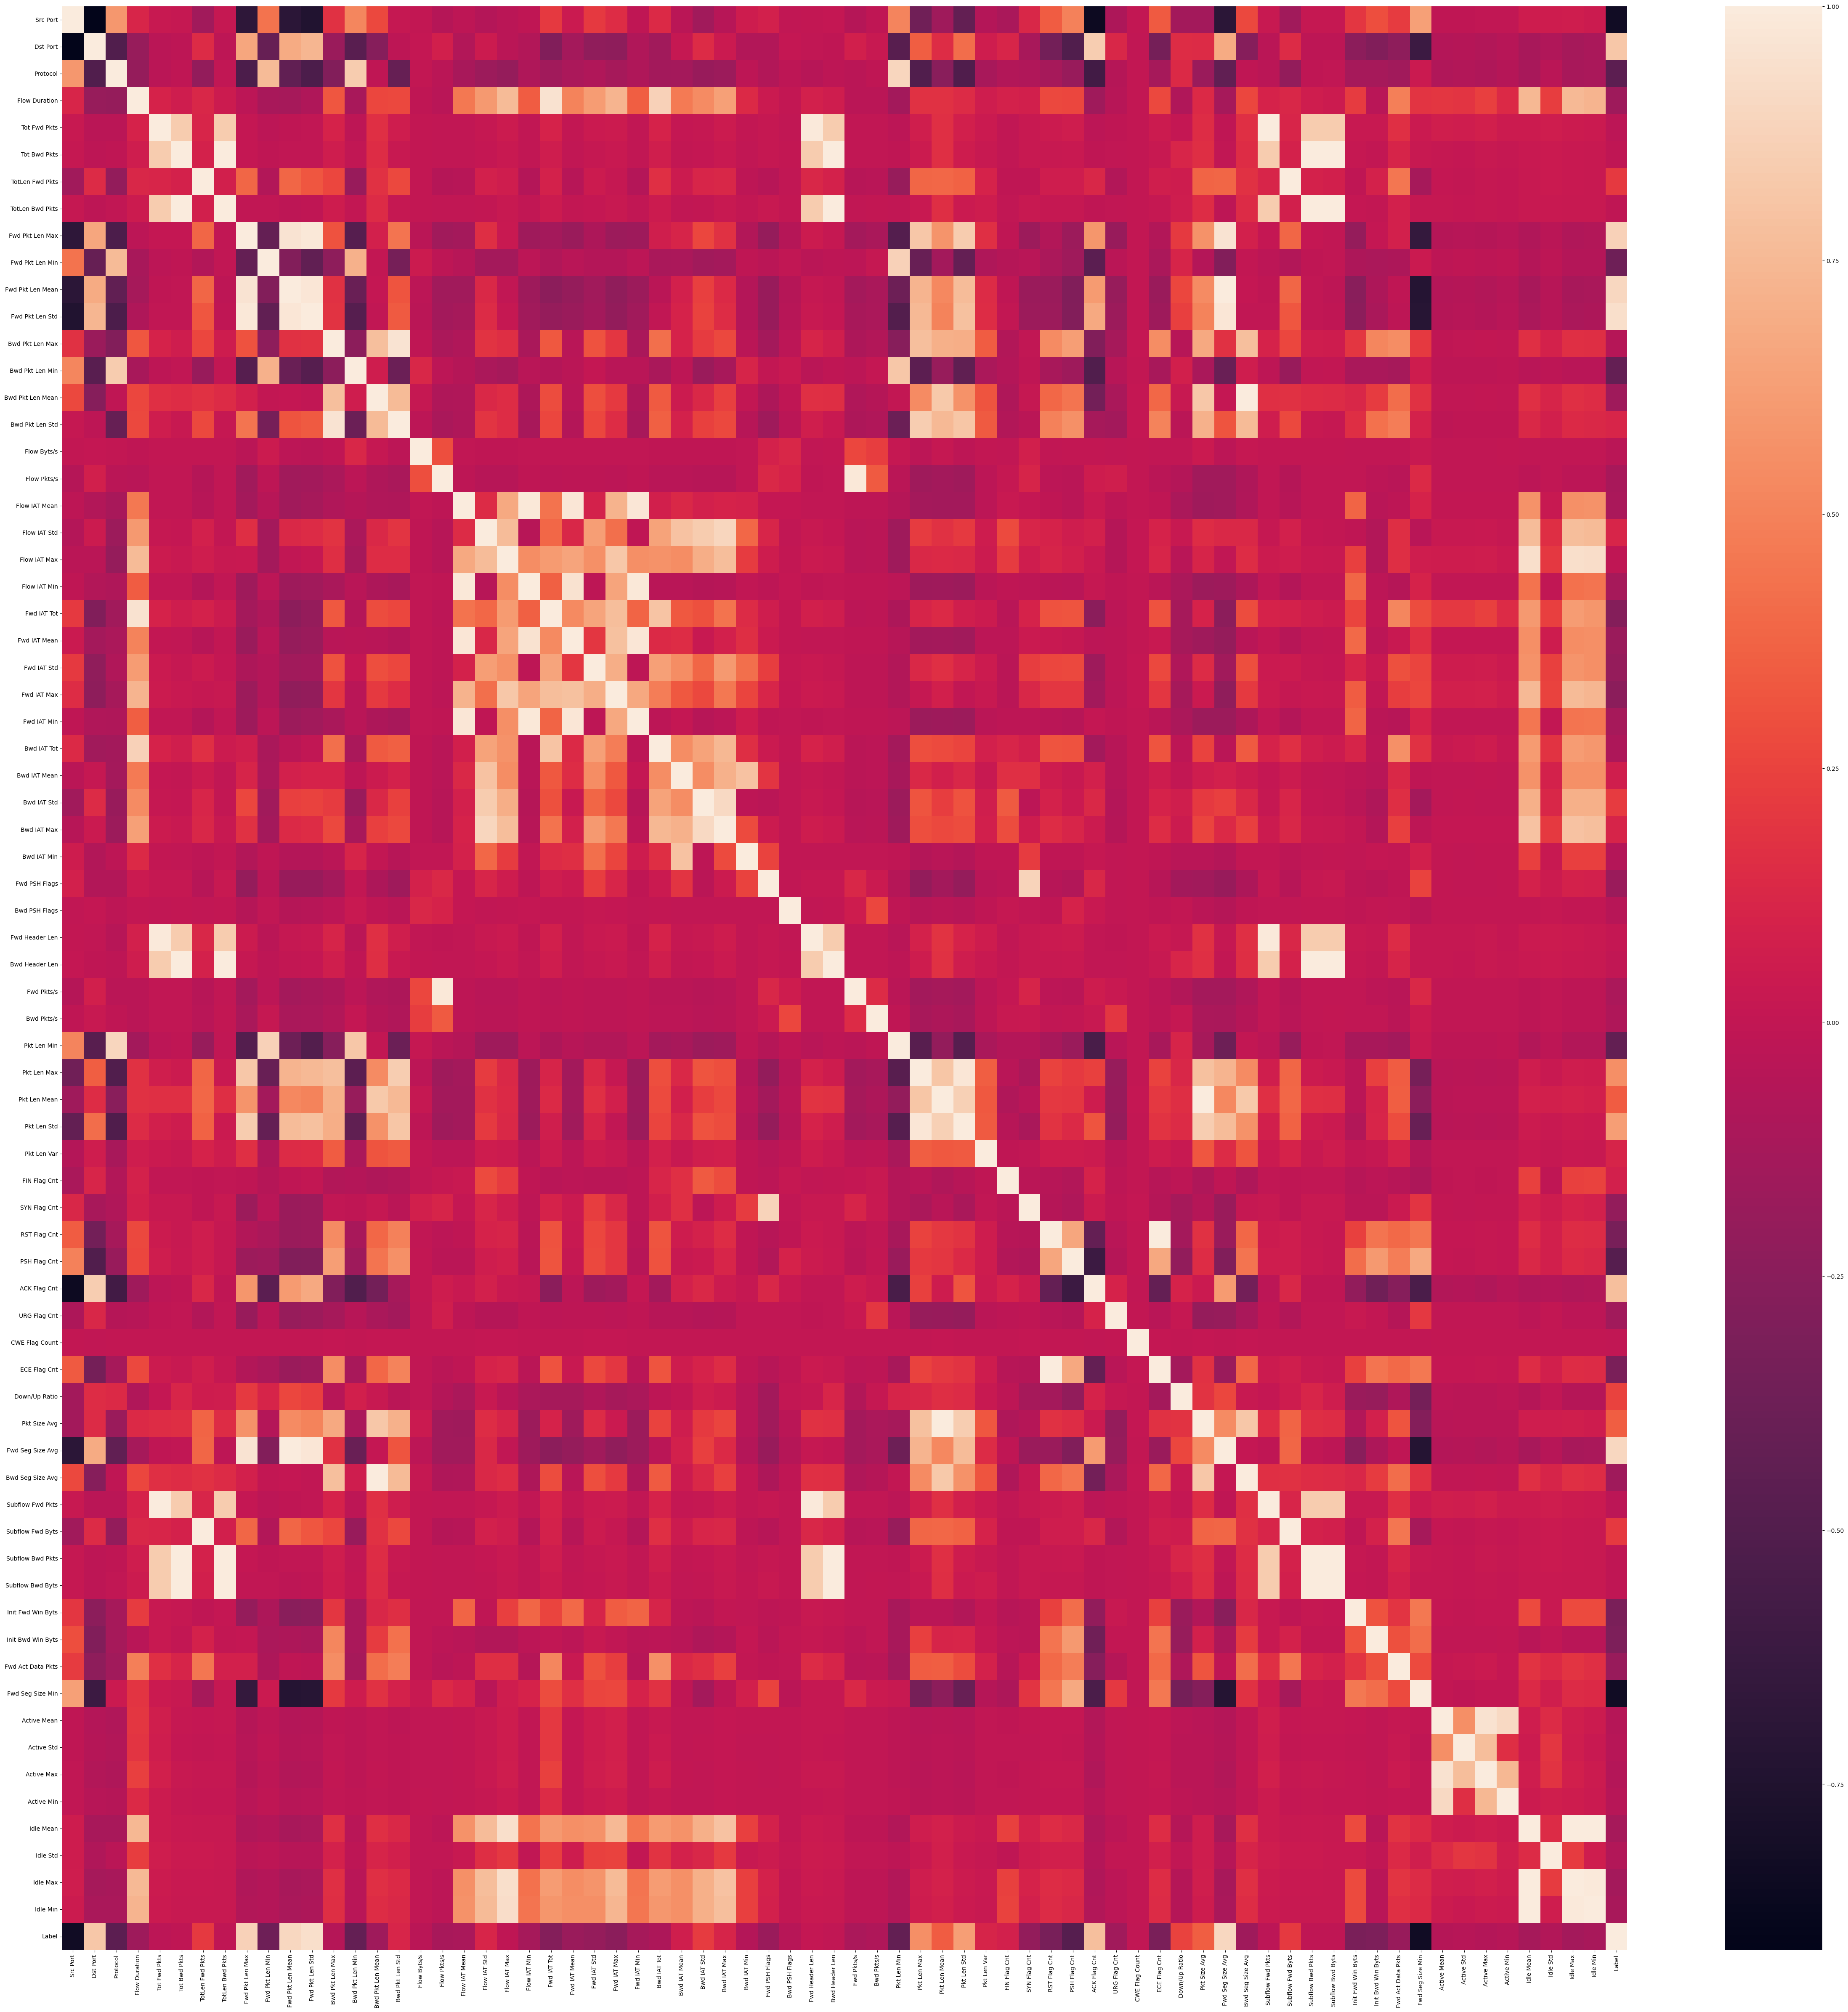

In [14]:
corr = df1.corr()
plt.figure(figsize=(60,60))
sns.heatmap(corr)

In [25]:
corr['Label'].sort_values(ascending=False)

Label                1.000000
Fwd Pkt Len Std      0.932909
Fwd Seg Size Avg     0.898256
Fwd Pkt Len Mean     0.898256
Fwd Pkt Len Max      0.869975
Dst Port             0.816694
ACK Flag Cnt         0.779760
Pkt Len Std          0.622601
Pkt Len Max          0.558100
Pkt Size Avg         0.354709
Pkt Len Mean         0.346310
Down/Up Ratio        0.248850
Bwd IAT Std          0.216131
Subflow Fwd Byts     0.214453
TotLen Fwd Pkts      0.214453
Bwd Pkt Len Std      0.111032
Flow IAT Std         0.110805
Pkt Len Var          0.105024
Bwd IAT Max          0.103721
FIN Flag Cnt         0.082478
Bwd IAT Mean         0.072205
Fwd Header Len       0.007963
Bwd Header Len      -0.001910
CWE Flag Count      -0.002170
Flow IAT Max        -0.009204
Tot Bwd Pkts        -0.013026
Subflow Bwd Pkts    -0.013026
TotLen Bwd Pkts     -0.015758
Subflow Bwd Byts    -0.015758
Tot Fwd Pkts        -0.024032
Subflow Fwd Pkts    -0.024032
Flow Byts/s         -0.035949
Active Min          -0.046520
Bwd PSH Fl

In [18]:
c = corr[(corr['Label']>0.3) | (corr['Label']<-0.3)]
c['Label'].sort_values()

Src Port            -0.828926
Fwd Seg Size Min    -0.828510
PSH Flag Cnt        -0.482871
Protocol            -0.450749
Pkt Len Min         -0.423990
Bwd Pkt Len Min     -0.415104
Fwd Pkt Len Min     -0.369050
RST Flag Cnt        -0.323818
ECE Flag Cnt        -0.322261
Init Fwd Win Byts   -0.319031
Init Bwd Win Byts   -0.306553
Pkt Len Mean         0.346310
Pkt Size Avg         0.354709
Pkt Len Max          0.558100
Pkt Len Std          0.622601
ACK Flag Cnt         0.779760
Dst Port             0.816694
Fwd Pkt Len Max      0.869975
Fwd Pkt Len Mean     0.898256
Fwd Seg Size Avg     0.898256
Fwd Pkt Len Std      0.932909
Label                1.000000
Name: Label, dtype: float64

In [20]:
c['Label'].index

Index(['Src Port', 'Dst Port', 'Protocol', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Min', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'ECE Flag Cnt', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Label'],
      dtype='object')

In [19]:
# extracting the labels
y = df1['Label']
df1 = df1.drop('Label',axis=1)

In [22]:
# dropping source port and dest port because they do not contribute to attack detection
df1 = df1[['Protocol', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Min', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'ECE Flag Cnt', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Seg Size Min']]
df1.head()

,Protocol,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Min,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,ECE Flag Cnt,Pkt Size Avg,Fwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min
0,6,935.0,0.0,233.75,467.5,0.0,0.0,935.0,142.222222,318.434757,0,0,1,0,160.000,233.75,-1,211,0
1,6,935.0,0.0,233.75,467.5,0.0,0.0,935.0,140.333333,317.129311,0,0,1,0,157.875,233.75,-1,211,0
2,6,935.0,0.0,233.75,467.5,0.0,0.0,935.0,139.888889,316.836095,0,0,1,0,157.375,233.75,-1,211,0
3,6,935.0,0.0,233.75,467.5,0.0,0.0,935.0,149.777778,324.594662,0,0,1,0,168.500,233.75,-1,211,0
4,6,935.0,0.0,233.75,467.5,0.0,0.0,935.0,143.888889,319.665624,0,0,1,0,161.875,233.75,-1,211,0
